# Price Competition - Airlines
Consider two companies competing on price. The goods (or services) the companies are providing are completely homogenous - they are completely identical. A good example of such a market is the market for economy airline tickets. Most consumers purchasing economy airline tickets is only interested in getting from A to B, and usually have no loyalty or preference in the choice of airline. As a consequence, we assume that the consumer will purchase whichever airline ticket is cheapest. This would typically lead to very low, if any, profit margins for airlines.

## Demand Function Construction
Consider a world where everything that exitst are two airlines and 500 consumers. Each of the airlines have one airplane with 100 passenger seats each. Every consumers has some wealth, and since the only thing they can do in this world is to buy airline tickets they will if they can afford one. 

In [1]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt

# Variables
no_of_consumers = 300
max_price = 100
min_price = 20

# Assigning random consumer bid prices
demand = np.random.uniform(max_price, min_price, no_of_consumers)

Now we have the size of the airplanes and some bidding prices for all consumers in the market. Before we can look at how the market clears, we should study the demand function. The demand is simply the number of  airline tickets that will be sold at a given price. So any consumer facing a market price below or equal to their preferred price will buy a ticket.

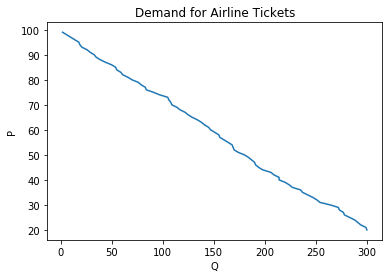

In [2]:
#Constructing demand function
cummulative_demand = np.zeros(max_price - min_price)

i = 0
for price in range(min_price, max_price):

    cummulative_demand[i] = sum(price <= bid for bid in demand)
    i += 1

# Plotting the demand curve
plt.plot(cummulative_demand, range(min_price, max_price))
plt.xlabel("Q")
plt.ylabel("P")
plt.title("Demand for Airline Tickets")
plt.show()

We see that we get a fairly straight line, which is due to the uniformly distributed prices. Moreover, demand is falling as price increases, which is reasonable.

## Playing the Airline Game
Now that we have the demand for airline seats, it is ut to the two airlines to set their prices. 

In [3]:
# Function that determines the revenue and no of filled seats
def sell_tickets(airline_1_price, airline_2_price, demand):
    
    # Available seats
    seats_in_flight = 100
    airline_1_seats = seats_in_flight
    airline_2_seats = seats_in_flight
    total_seats = airline_1_seats + airline_2_seats
    consumer_bids = demand
    
    for bid in consumer_bids:
    
        # Will stop searching for available seats if there are none.
        if (total_seats <= 0):
            break
        
        # Both airlines have empty seats
        if (airline_1_seats > 0 and airline_2_seats > 0):
        
            # Airline 1 is cheapest
            if (airline_1_price <= airline_2_price):
                if (bid >= airline_1_price):
                    airline_1_seats -= 1
                    total_seats -= 1
            # Airline 2 is cheapest
            else:
                if (bid >= airline_2_price):
                    airline_2_seats -= 1
                    total_seats -=1
    
        # Only airline 1 has empty seats
        elif (airline_1_seats > 0 and airline_2_seats == 0):
        
            if (bid >= airline_1_price):
                airline_1_seats -= 1
                total_seats -= 1
    
        # Only airline 2 has empty seats
        elif (airline_2_seats > 0 and airline_1_seats == 0):
        
            if (bid >= airline_2_price):
                airline_2_seats -= 1
                total_seats -=1       
    
    revenue_1 = (seats_in_flight - airline_1_seats)*price_1
    revenue_2 = (seats_in_flight - airline_2_seats)*price_2

    print("{:12s} {:8s} {:8s}" .format("", "Airline 1", "Airline 2"))
    print("{:12s} {:8d} {:8d}" .format("Ticket Price", price_1, price_2))
    print("{:12s} {:8d} {:8d}" .format("Empty seats", airline_1_seats, airline_2_seats))
    print("{:12s} {:8d} {:8d}" .format("Revenue",  revenue_1, revenue_2))

# Playing the airline game
price_1 = 75
price_2 = 80
sell_tickets(price_1, price_2, demand)

price_1 = 90
price_2 = 80
sell_tickets(price_1, price_2, demand)

price_1 = 66
price_2 = 50
sell_tickets(price_1, price_2, demand)


             Airline 1 Airline 2
Ticket Price       75       80
Empty seats         9      100
Revenue          6825        0
             Airline 1 Airline 2
Ticket Price       90       80
Empty seats       100       30
Revenue             0     5600
             Airline 1 Airline 2
Ticket Price       66       50
Empty seats        42        0
Revenue          3828     5000


According to the theory, the one who sets the lowest price gets all the customers. The problem here is that the availability of tickets is also scarce. 

I have run three example games of how this might play out. In the first game Airline 1 sets ticket price to 75 and Airline 2 sets the ticket price to 80. The outcome of the game is that Airline 1 has a nearly full plane, while Airline 2 sells no tickets at all. I leave it to the reader to play around with this if they like. However, the way I have constructed the "airline game" is not very flexible. It is not very easy to introduce a third airline into the mix, for instance. One will likely be reusing a lot of code in this script-like setup. A better way of doing things is with an object-oriented design.

## The Object-Oriented Airline Game
You could easily skip this paragraph if you know what Object-Oriented Desing is. In object-oriented programming (OOP) or design (OOD), one constructs classes as templates that represent real-life objects. An airline or airplane could easily be made into a class. All airlines have the same attributes, at least within this simple world in which we are imagining ourselves. Example of such attributes can be a name, a capacity and a price. A particular instance of the airline class would be an object, or class instance. I have constructed a module for playing the airline game in an object-oriented way.

In [1]:
# Importing airline module
from airlines import *

Now all classis within the module should be imported. There are three classes available in the module `Airline`, `DemandFunction` and `AirlineMarket`. The use of each class is quite self-explanatory. The `Airline` class allows you to make `Airline` objects. 

In [2]:
# Creating new Airline object
british_airways = Airline()

# Setting attributes
british_airways.set_name("British Airways")
british_airways.set_capacity(100)
british_airways.set_price(50)

# Printing attributes
print("{:10s} {:>14s}".format("Airline:", british_airways.get_name()))
print("{:10s} {:>14d}".format("Capacity:", british_airways.get_capacity()))
print("{:10s} {:>14d}".format("Price:", british_airways.get_price()))

Airline:   British Airways
Capacity:             100
Price:                 50


Alternatively, all attributes of the class can be added when the object is constructed.

In [3]:
# Creating new Airline object
air_france = Airline("Air France", 120, 45)

# Printing attributes
print("{:10s} {:>14s}".format("Airline:", air_france.get_name()))
print("{:10s} {:>14d}".format("Capacity:", air_france.get_capacity()))
print("{:10s} {:>14d}".format("Price:", air_france.get_price()))

Airline:       Air France
Capacity:             120
Price:                 45


The `DemandFunction` class represents the consumers, or ticket buyers, in the market. It contains several methods for generating sample demand functions. 

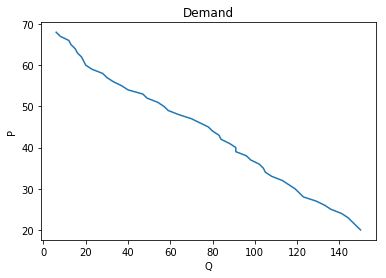

In [4]:
# Creating a DemandFunction object. Argument is no of consumers
airline_demand = DemandFunction(150)

# Generate uniformly distributed demand
airline_demand.generate_uniform(20, 70)

# Plot demand curve
airline_demand.plot_demand()

It is also possible to generate normally distributed consumer bidding prices with the `generate_normal()` method, or add whatever priced you would like with the `set_demand()` method.

Now that we have a demand function and a couple of airlines these can be added to an object of the `AirlineMarket` class.

In [8]:
# Creating AirlineMarket object
airline_market = AirlineMarket()

# Adding airlines and consumers to market
airline_market.add_airline(british_airways)
airline_market.add_airline(air_france)
airline_market.set_demand(airline_demand)

# Playing the game!
airline_market.allocate_tickets()

--------------------
No of consumers:  150 

Airline              Capacity    Seats left  Ticket price
Air France                120            42            45
British Airways           100            44            50
--------------------
